In [52]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from us import states
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process

In [2]:
# read in the csv file 
DSjob_Feb2019 = pd.read_csv('./DataSources/Data_10k_DS_Postings_USA/data_scientist_united_states_job_postings_jobspikr.csv')
DSjob_Feb2019.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [3]:
DSjob_Feb2019.info() 

# findings:
# 1) Even tho there is a salary column, there is few valid data points, so this column can be dropped. - 
# 2) Only 15% have job descriptions
# 3) over 90% include company category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crawl_timestamp       10000 non-null  object 
 1   url                   10000 non-null  object 
 2   job_title             10000 non-null  object 
 3   category              9118 non-null   object 
 4   company_name          9999 non-null   object 
 5   city                  9751 non-null   object 
 6   state                 9584 non-null   object 
 7   country               10000 non-null  object 
 8   inferred_city         8980 non-null   object 
 9   inferred_state        9484 non-null   object 
 10  inferred_country      9505 non-null   object 
 11  post_date             10000 non-null  object 
 12  job_description       10000 non-null  object 
 13  job_type              10000 non-null  object 
 14  salary_offered        597 non-null    object 
 15  job_board           

In [4]:
# first only extract the columns of concern
DSjob_Feb2019 = DSjob_Feb2019[['job_title','category','company_name','city','state',\
                              'inferred_city','inferred_state','post_date','job_description',\
                              'job_type','job_board']]
DSjob_Feb2019.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        10000 non-null  object
 1   category         9118 non-null   object
 2   company_name     9999 non-null   object
 3   city             9751 non-null   object
 4   state            9584 non-null   object
 5   inferred_city    8980 non-null   object
 6   inferred_state   9484 non-null   object
 7   post_date        10000 non-null  object
 8   job_description  10000 non-null  object
 9   job_type         10000 non-null  object
 10  job_board        9310 non-null   object
dtypes: object(11)
memory usage: 859.5+ KB


In [5]:
# find the unique job title
Uniq_title = DSjob_Feb2019.job_title.unique()
len(Uniq_title)


2754

In [6]:
DSjob_Feb2019.job_title = DSjob_Feb2019.job_title.astype(str)
DSjob_Feb2019['inferred_job_title'] = DSjob_Feb2019['job_title']
DSjob_Feb2019
# type(DSjob_Feb2019.job_title)
# jobtitles = DSjob_Feb2019.job_title.remove_index
# type(jobtitles)

,job_title,category,company_name,city,state,inferred_city,inferred_state,post_date,job_description,job_type,job_board,inferred_job_title
0,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Woodland hills,California,2019-02-06,Read what people are saying about working here...,Undefined,indeed,Enterprise Data Scientist I
1,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Middletown,New jersey,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,dice,Data Scientist
2,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,New york,New york,2019-02-05,Candidates should have the following backgroun...,Full Time,dice,Data Scientist
3,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),New york,New york,2019-02-06,Read what people are saying about working here...,Undefined,indeed,"Data Scientist, Aladdin Wealth Tech, Associate..."
4,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Charlotte,North carolina,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,monster,Senior Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Data Scientist,Data Scientist,Upstart,Columbus,NaN,Columbus,Wisconsin,2019-09-27,Join Upstart and help build the future of cred...,Full Time,Stackoverflow,Data Scientist
9996,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,Santa clara,New mexico,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,Stackoverflow,"Data Scientist, (Staff or Principal)"
9997,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,Pittsburgh,Pennsylvania,2019-09-03,Job Summary: Would you like to play a part in ...,Full Time,Stackoverflow,"Siri - Embedded Data Scientist, Data Organization"
9998,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,Santa clara,New mexico,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,Stackoverflow,"Data Scientist, (Staff or Principal)"


In [7]:
# create a new column "inferred_job_title" to store the finalized job_title names
# DSjob_Feb2019.insert(2, 'inferred_job_title', [DSjob_Feb2019.job_title], True)
# df.insert(2, "Age", [21, 23, 24, 21], True) 

grouped_title = DSjob_Feb2019.groupby('job_title')['category'].count().sort_values(ascending=False)
grouped_title.head(60)

job_title
Data Scientist                                                                      2560
Senior Data Scientist                                                                570
Sr. Data Scientist                                                                   183
Lead Data Scientist                                                                  161
Principal Data Scientist                                                             140
Data Scientist II                                                                     97
Associate Data Scientist                                                              78
Sr Data Scientist                                                                     76
Data Scientist I                                                                      48
Junior Data Scientist                                                                 46
Data Scientist, (Staff or Principal)                                                  45
Staff Data 

In [8]:
for irow in np.arange(len(DSjob_Feb2019)):
    DSjob_Feb2019.job_title[irow] = DSjob_Feb2019.job_title[irow].casefold()

    if (("data scientist" in DSjob_Feb2019.job_title[irow]) &\
        (("sr" in DSjob_Feb2019.job_title[irow]) | ("senior" in DSjob_Feb2019.job_title[irow])\
         | ("experienced" in DSjob_Feb2019.job_title[irow]) | (" ii" in DSjob_Feb2019.job_title[irow])\
         | ("expert" in DSjob_Feb2019.job_title[irow]) | ("2" in DSjob_Feb2019.job_title[irow]) ) ):
        DSjob_Feb2019['inferred_job_title'][irow] = 'Senior Data Scientist'

    elif (("data scientist" in DSjob_Feb2019.job_title[irow]) &\
        ((" i" in DSjob_Feb2019.job_title[irow]) | ("junior" in DSjob_Feb2019.job_title[irow])\
         | ("jr" in DSjob_Feb2019.job_title[irow]) | ("asso" in DSjob_Feb2019.job_title[irow])\
         | ("entry level" in DSjob_Feb2019.job_title[irow]) | ("1" in DSjob_Feb2019.job_title[irow])) ):
        DSjob_Feb2019['inferred_job_title'][irow] = 'Junior Data Scientist'
        
    elif (("data scientist" in DSjob_Feb2019.job_title[irow]) &\
        (("princip" in DSjob_Feb2019.job_title[irow]) | ("lead" in DSjob_Feb2019.job_title[irow])\
         | ("staff" in DSjob_Feb2019.job_title[irow]) | ("chief" in DSjob_Feb2019.job_title[irow])\
         | ("3" in DSjob_Feb2019.job_title[irow]) | ("4" in DSjob_Feb2019.job_title[irow])\
         | ("iii" in DSjob_Feb2019.job_title[irow]) | ("iv" in DSjob_Feb2019.job_title[irow])) ):
        DSjob_Feb2019['inferred_job_title'][irow] = 'Chief/Princinpal/Lead Data Scientist'   
        
    elif (("data scientist" in DSjob_Feb2019.job_title[irow] or "scientist" in DSjob_Feb2019.job_title[irow])):
        DSjob_Feb2019['inferred_job_title'][irow] = 'Data Scientist' 
        
DSjob_Feb2019

,job_title,category,company_name,city,state,inferred_city,inferred_state,post_date,job_description,job_type,job_board,inferred_job_title
0,enterprise data scientist i,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Woodland hills,California,2019-02-06,Read what people are saying about working here...,Undefined,indeed,Junior Data Scientist
1,data scientist,NaN,Luxoft USA Inc,Middletown,NJ,Middletown,New jersey,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,dice,Data Scientist
2,data scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,New york,New york,2019-02-05,Candidates should have the following backgroun...,Full Time,dice,Data Scientist
3,"data scientist, aladdin wealth tech, associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),New york,New york,2019-02-06,Read what people are saying about working here...,Undefined,indeed,Junior Data Scientist
4,senior data scientist,biotech,CyberCoders,Charlotte,NC,Charlotte,North carolina,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,monster,Senior Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,data scientist,Data Scientist,Upstart,Columbus,NaN,Columbus,Wisconsin,2019-09-27,Join Upstart and help build the future of cred...,Full Time,Stackoverflow,Data Scientist
9996,"data scientist, (staff or principal)",Data Scientist,Realtor.com,Santa Clara,NaN,Santa clara,New mexico,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,Stackoverflow,Chief/Princinpal/Lead Data Scientist
9997,"siri - embedded data scientist, data organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,Pittsburgh,Pennsylvania,2019-09-03,Job Summary: Would you like to play a part in ...,Full Time,Stackoverflow,Data Scientist
9998,"data scientist, (staff or principal)",Data Scientist,Realtor.com,Santa Clara,NaN,Santa clara,New mexico,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,Stackoverflow,Chief/Princinpal/Lead Data Scientist


In [9]:
# now category the titles by levels
grouped_title = DSjob_Feb2019.groupby('inferred_job_title')['category'].count().sort_values(ascending=False)
grouped_title.head(60)

inferred_job_title
Data Scientist                          4610
Senior Data Scientist                   2471
Junior Data Scientist                   1182
Chief/Princinpal/Lead Data Scientist     855
Name: category, dtype: int64

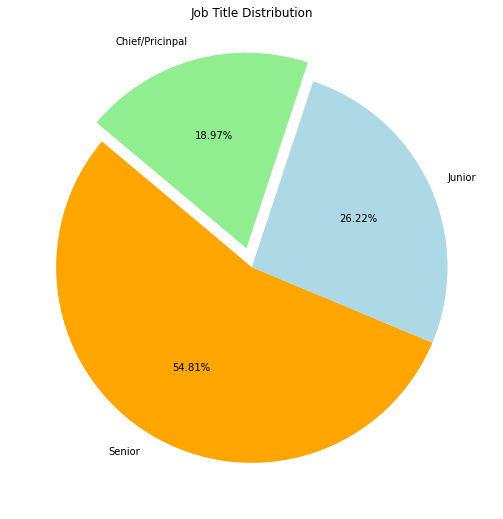

In [10]:
# do a pie chart of the number of job openings for different levels

# Labels for the sections of our pie chart
labels = ["Senior", "Junior", "Chief/Pricinpal"]

# The values of each section of the pie chart
sizes = grouped_title[1:4]

# The colors of each section of the pie chart
colors = ["orange", "lightblue", "lightgreen"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

plt.figure(figsize=(9,9))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.2f%%", startangle=140)
plt.title('Job Title Distribution')
plt.savefig("./Images/Job_Title_Distribution_Junior_Senior_etc.png")
plt.show()

In [11]:
# Now use fuzzywuzzy to extract all those with "Data Scientist" title
# process.extractOne("Data Scientist", Uniq_title, scorer=60)

In [12]:
# find the unique company category/industry sector
Uniq_Category = DSjob_Feb2019.category.unique()
len(Uniq_Category)

367

In [13]:
# let's do groupby 
# len(DSjob_Feb2019.groupby('category')['company_name'].count())
len(DSjob_Feb2019.groupby('category').count())

366

In [14]:
grouped_cat = DSjob_Feb2019.groupby('category')['job_title'].count().sort_values(ascending=False)
grouped_cat.head(50)

category
Computer-or-internet                   1505
computer jobs                           911
life physical and social science        758
Engineering-or-architecture             729
Manufacturing-or-mechanical             632
business and financial operations       616
math jobs                               582
Computer/Internet                       467
Engineering/Architecture                324
Data Scientist                          223
Manufacturing/Mechanical                159
Accounting-or-finance                   155
Administrative                          135
Accounting/Finance                      129
architecture and engineering            111
Sales                                    93
Customer-Service                         78
Senior Data Scientist                    77
Government-or-military                   75
Arts/Entertainment/Publishing            72
social science jobs                      69
Human-Resources                          50
media jobs             

In [15]:
# Standard Column Names

# job_title
# industry_sector
# company_name
# city
# state
# post_date
# job_description
# job_type (full-time, part-time, contractor, others)
# salary

In [16]:
# do some compiling of job categories
# finalized categories:

# Computer/Internet
# Consulting/Recruiting (life/physical/social sciences)
# Engineering/Architecture 
# Manufacturing/Mechanical/Construction
# Business/Finance/Accounting
# Sales/HR/Retail/Services
# Education
# Government/Military
# Art/Entertainment/Media
# Healthcare

In [17]:
DSjob_Feb2019.category = DSjob_Feb2019.category.astype(str)

# create a new column "inferred_category" to store the finalized category names
DSjob_Feb2019['inferred_category'] = DSjob_Feb2019['category']

for irow in np.arange(len(DSjob_Feb2019)):
    DSjob_Feb2019.category[irow] = DSjob_Feb2019.category[irow].casefold()

    if (("computer" in DSjob_Feb2019.category[irow]) or ("internet" in DSjob_Feb2019.category[irow])):
        DSjob_Feb2019['inferred_category'][irow] = 'Computer/Internet'
                       
    elif (("life" in DSjob_Feb2019.category[irow]) or ("physical" in DSjob_Feb2019.category[irow])\
         or ("social" in DSjob_Feb2019.category[irow]) or ("consult" in DSjob_Feb2019.category[irow])):
        DSjob_Feb2019['inferred_category'][irow] = 'Consulting/Recruiting'     
        
    elif (("engineering" in DSjob_Feb2019.category[irow]) | ("architecture" in DSjob_Feb2019.category[irow])):
        DSjob_Feb2019['inferred_category'][irow] = 'Engineering/Architecture'
        
    elif (("manufacturing" in DSjob_Feb2019.category[irow]) | ("mechanical" in DSjob_Feb2019.category[irow])\
       | ("construction" in DSjob_Feb2019.category[irow]) | ("facilities" in DSjob_Feb2019.category[irow])):
        DSjob_Feb2019['inferred_category'][irow] = 'Manufacturing/Mechanical'
        
    elif (("business" in DSjob_Feb2019.category[irow]) | ("financ" in DSjob_Feb2019.category[irow])\
       | ("insurance" in DSjob_Feb2019.category[irow]) | ("marketing" in DSjob_Feb2019.category[irow])\
       | ("banking" in DSjob_Feb2019.category[irow]) | ("advertis" in DSjob_Feb2019.category[irow])):
        DSjob_Feb2019['inferred_category'][irow] = 'Business/Finance/Accounting'
    
    elif (("sales" in DSjob_Feb2019.category[irow]) | ("human" in DSjob_Feb2019.category[irow])\
       | ("hr" in DSjob_Feb2019.category[irow]) | ("retail" in DSjob_Feb2019.category[irow])\
       | ("service" in DSjob_Feb2019.category[irow]) | ("advertis" in DSjob_Feb2019.category[irow])):
        DSjob_Feb2019['inferred_category'][irow] = 'Sales/HR/Retail/Services'
        
    elif (("government" in DSjob_Feb2019.category[irow]) | ("military" in DSjob_Feb2019.category[irow])):
        DSjob_Feb2019['inferred_category'][irow] = 'Government/Military'
          
    elif (("art" in DSjob_Feb2019.category[irow]) | ("entertain" in DSjob_Feb2019.category[irow])\
       | ("media" in DSjob_Feb2019.category[irow])):
        DSjob_Feb2019['inferred_category'][irow] = 'Art/Entertainment/Media'
          
    elif (("healthcare" in DSjob_Feb2019.category[irow]) ):
        DSjob_Feb2019['inferred_category'][irow] = 'Healthcare'
          
    elif (("univ" in DSjob_Feb2019.company_name[irow].casefold())\
          |("institute" in DSjob_Feb2019.company_name[irow].casefold())\
          |("school" in DSjob_Feb2019.company_name[irow].casefold())) :
        DSjob_Feb2019['inferred_category'][irow] = 'Education'
    else:
        DSjob_Feb2019['inferred_category'][irow] = 'Others/Unspecified'
        
# #     df[col].str.contains(r"\^", na=False) 

DSjob_Feb2019.head(50)

,job_title,category,company_name,city,state,inferred_city,inferred_state,post_date,job_description,job_type,job_board,inferred_job_title,inferred_category
0,enterprise data scientist i,accounting/finance,Farmers Insurance Group,Woodland Hills,CA,Woodland hills,California,2019-02-06,Read what people are saying about working here...,Undefined,indeed,Junior Data Scientist,Business/Finance/Accounting
1,data scientist,nan,Luxoft USA Inc,Middletown,NJ,Middletown,New jersey,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,dice,Data Scientist,Others/Unspecified
2,data scientist,nan,Cincinnati Bell Technology Solutions,New York,NY,New york,New york,2019-02-05,Candidates should have the following backgroun...,Full Time,dice,Data Scientist,Others/Unspecified
3,"data scientist, aladdin wealth tech, associate...",accounting/finance,BlackRock,New York,NY 10055 (Midtown area),New york,New york,2019-02-06,Read what people are saying about working here...,Undefined,indeed,Junior Data Scientist,Business/Finance/Accounting
4,senior data scientist,biotech,CyberCoders,Charlotte,NC,Charlotte,North carolina,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,monster,Senior Data Scientist,Others/Unspecified
5,cib – fixed income research – machine learning...,accounting/finance,JP Morgan Chase,New York,NY 10179 (Midtown area),New york,New york,2019-02-05,Read what people are saying about working here...,Undefined,indeed,Junior Data Scientist,Business/Finance/Accounting
6,"data scientist, licensing operations",accounting/finance,Spotify,New York,NY 10011 (Chelsea area),New york,New york,2019-02-06,Read what people are saying about working here...,Undefined,indeed,Data Scientist,Business/Finance/Accounting
7,sr. data scientist (can work on xoriant w2),nan,Xoriant Corporation,Santa Clara,CA,Santa clara,California,2019-02-06,Job Title: - Sr. Data Science Consultant Durat...,Contract,dice,Senior Data Scientist,Others/Unspecified
8,"data scientist, aladdin wealth tech, associate",accounting/finance,BlackRock,New York,NY 10055 (Midtown area),New york,New york,2019-02-06,Read what people are saying about working here...,Undefined,indeed,Junior Data Scientist,Business/Finance/Accounting
9,data scientist,nan,Adroit Resources,San Francisco,CA,San francisco,California,2019-02-05,• 3+ years related a professional experience ...,Contract,dice,Data Scientist,Others/Unspecified


In [18]:
grouped_cat = DSjob_Feb2019.groupby('inferred_category')['job_title'].count().sort_values(ascending=False)
grouped_cat.head(50)

# type(grouped_cat)


inferred_category
Computer/Internet              2889
Others/Unspecified             2414
Engineering/Architecture       1175
Business/Finance/Accounting    1057
Consulting/Recruiting           908
Manufacturing/Mechanical        839
Sales/HR/Retail/Services        352
Art/Entertainment/Media         158
Government/Military              95
Education                        65
Healthcare                       48
Name: job_title, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

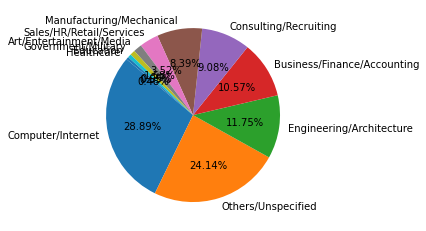

In [19]:
# do a pie chart of the number of job openings for different industries

# Labels for the sections of our pie chart
labels = ['Computer/Internet','Others/Unspecified','Engineering/Architecture','Business/Finance/Accounting','Consulting/Recruiting',\
         'Manufacturing/Mechanical','Sales/HR/Retail/Services','Art/Entertainment/Media','Government/Military',\
         'Education','Healthcare']

# The values of each section of the pie chart
sizes = grouped_cat.values

# The colors of each section of the pie chart
# colors = ["red", "blue", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
# explode = (0, 0, 0.1)

plt.pie(sizes, labels=labels, #explode=explode, colors=colors,
        autopct="%.2f%%", startangle=140)
plt.show

In [20]:
# # now do a bar chart instead
# plt.barh(labels, sizes, color='b', alpha=0.5, align="center")

# plt.title("Job Openings of Industry Sectors")
# plt.xlabel("Number of Job Openings")
# plt.savefig("./Images/Bar_JobOpenings_vs_Industry.png")
# plt.grid()
# # plt.tight_layout()
# plt.show()

In [21]:
# construct a dataFrame using the industry keywords and job opening counts for each industry
df_IndustryDist = pd.DataFrame({'Industry_Sectors':labels, 'JobOpening_Counts':sizes})
df_IndustryDist

,Industry_Sectors,JobOpening_Counts
0,Computer/Internet,2889
1,Others/Unspecified,2414
2,Engineering/Architecture,1175
3,Business/Finance/Accounting,1057
4,Consulting/Recruiting,908
5,Manufacturing/Mechanical,839
6,Sales/HR/Retail/Services,352
7,Art/Entertainment/Media,158
8,Government/Military,95
9,Education,65


<Figure size 936x576 with 0 Axes>

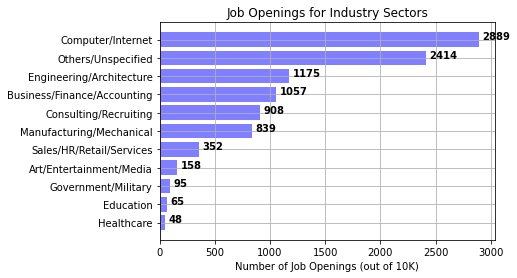

In [22]:
df_IndustryDist.sort_values('JobOpening_Counts',inplace=True)

# now do a bar chart on desired Technical Skills
plt.figure(figsize=(13,8))
fig,ax = plt.subplots()

ax.barh(df_IndustryDist.Industry_Sectors, df_IndustryDist.JobOpening_Counts, color='b', alpha=0.5, align="center")

plt.title("Job Openings for Industry Sectors")
ax.set_xlabel("Number of Job Openings (out of 10K)")

for i, v in enumerate(df_IndustryDist.JobOpening_Counts):
    ax.text(v + 30, i, str(v), color='black', fontweight='bold')
plt.grid()
plt.savefig("./Bar_JobOpenings_vs_Industry.png", bbox_inches='tight')
# plt.tight_layout()
plt.show()


In [23]:
# now examine by job_type (full-time/part-time/internship/contract)

DSjob_Feb2019.job_type = DSjob_Feb2019.job_type.astype(str)

# create a new column "inferred_category" to store the finalized category names
DSjob_Feb2019['inferred_job_type'] = DSjob_Feb2019['job_type']

for irow in np.arange(len(DSjob_Feb2019)):
    
    DSjob_Feb2019.job_type[irow] = DSjob_Feb2019.job_type[irow].casefold()

    if ("full" in DSjob_Feb2019.job_type[irow]):
        DSjob_Feb2019['inferred_job_type'][irow] = 'Full-time'

    elif ("part" in DSjob_Feb2019.job_type[irow]):
        DSjob_Feb2019['inferred_job_type'][irow] = 'Part-time'
        
    elif ("intern" in DSjob_Feb2019.job_type[irow]):
        DSjob_Feb2019['inferred_job_type'][irow] = 'Internship'   
        
    elif ("contract" in DSjob_Feb2019.job_type[irow]):
        DSjob_Feb2019['inferred_job_type'][irow] = 'Contractor'
        
    else:
        DSjob_Feb2019['inferred_job_type'][irow] = 'Undefined'
        
grouped_jobtype = DSjob_Feb2019.groupby('inferred_job_type')['job_title'].count().sort_values(ascending=False)
grouped_jobtype.head(50)

inferred_job_type
Undefined     6109
Full-time     3395
Contractor     488
Part-time        6
Internship       2
Name: job_title, dtype: int64

In [24]:
# now examine by job_type & also search in job_description (full-time/part-time/internship/contract)

# -------- Before searching in job_desciption with keywords, only 40% are in the pool with job type
# -------- After searching in job_description with keywords, >50% are now in the pool with defined job type 

# More than 1K jobs are added to the pool with job types!

DSjob_Feb2019.job_type = DSjob_Feb2019.job_type.astype(str)
DSjob_Feb2019.job_description = DSjob_Feb2019.job_description.astype(str)

# create a new column "inferred_category" to store the finalized category names
DSjob_Feb2019['inferred_job_type'] = DSjob_Feb2019['job_type']

for irow in np.arange(len(DSjob_Feb2019)):
    
    DSjob_Feb2019.job_type[irow] = DSjob_Feb2019.job_type[irow].casefold()
    DSjob_Feb2019.job_description[irow] = DSjob_Feb2019.job_description[irow].casefold()

    if (("full" in DSjob_Feb2019.job_type[irow]) or ("full time" in DSjob_Feb2019.job_description[irow])\
       or ("full-time" in DSjob_Feb2019.job_description[irow]) or ("fulltime" in DSjob_Feb2019.job_description[irow])):
        DSjob_Feb2019['inferred_job_type'][irow] = 'Full-time'

    elif (("part" in DSjob_Feb2019.job_type[irow]) or ("part time" in DSjob_Feb2019.job_description[irow])\
       or ("part-time" in DSjob_Feb2019.job_description[irow]) or ("parttime" in DSjob_Feb2019.job_description[irow])):
        DSjob_Feb2019['inferred_job_type'][irow] = 'Part-time'
        
    elif (("intern" in DSjob_Feb2019.job_type[irow]) or ("intern " in DSjob_Feb2019.job_description[irow])\
         or ("internship" in DSjob_Feb2019.job_description[irow])):
        DSjob_Feb2019['inferred_job_type'][irow] = 'Internship'   
        
    elif (("contract" in DSjob_Feb2019.job_type[irow]) or ("contractor" in DSjob_Feb2019.job_description[irow])):
        DSjob_Feb2019['inferred_job_type'][irow] = 'Contractor'
        
    else:
        DSjob_Feb2019['inferred_job_type'][irow] = 'Undefined'
        
grouped_jobtype = DSjob_Feb2019.groupby('inferred_job_type')['job_title'].count().sort_values(ascending=False)
grouped_jobtype.head(50)

inferred_job_type
Undefined     4937
Full-time     4284
Contractor     630
Internship     120
Part-time       29
Name: job_title, dtype: int64

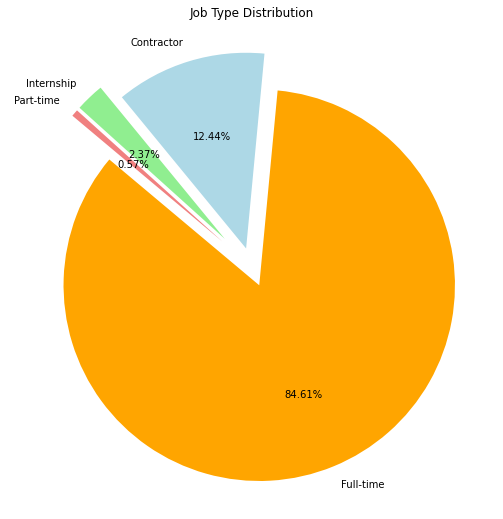

In [25]:
# Now do a pie chart with only those jobs with a defined type
# Labels for the sections of our pie chart

labels = ["Full-time", "Contractor", "Internship","Part-time"]

# The values of each section of the pie chart
sizes = grouped_jobtype[1:5]

# The colors of each section of the pie chart
colors = ["orange", "lightblue", "lightgreen",'lightcoral']

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0.1, 0.2, 0.2)
plt.figure(figsize=(9,9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.2f%%", startangle=140)

plt.title('Job Type Distribution')
plt.savefig("./Images/Job_Type_Distribution_Fulltime_Parttime_etc.png")
plt.show()


In [26]:
# Now time to conquer the job description to find out the answers to the following questions:

# 1) what are the technical skills employers value most?
# 2) what are the soft skills employers value most?
# 3) what are the technical tools employers value most?
#

In [27]:
# --------- 1) Technical Skills ------------

# finalized technical skill set keywords:

# Statistics / Statistical Analysis
# Research / Research Design
# Question Formulation 
# Visualization
# Deep Learning
# Machine Learning
# Domain Knowledge
# Analysis / Analytical
# Cloud Computing (AWS)
# Regression
# Probability
# Prediction
# Network / Neural Networks

# create new columns with above keywords to store the flag,
# indicating if that specific keyword is included in the description
# 0 -> not included; 
# 1 -> included

# initialize the flag tags
DSjob_Feb2019['TS_Stats_flag'] = 0 
DSjob_Feb2019['TS_Research_flag'] = 0 
DSjob_Feb2019['TS_QuesForm_flag'] = 0 
DSjob_Feb2019['TS_Visual_flag'] = 0 
DSjob_Feb2019['TS_DeepLearning_flag'] = 0 
DSjob_Feb2019['TS_MachineLearning_flag'] = 0 
DSjob_Feb2019['TS_DomainKnowledge_flag'] = 0 
DSjob_Feb2019['TS_Analy_flag'] = 0 
DSjob_Feb2019['TS_CloudComp_flag'] = 0 
DSjob_Feb2019['TS_Regress_flag'] = 0 
DSjob_Feb2019['TS_Probability_flag'] = 0 
DSjob_Feb2019['TS_Prediction_flag'] = 0 
DSjob_Feb2019['TS_NeuralNetwork_flag'] = 0 
DSjob_Feb2019.head(5)


,job_title,category,company_name,city,state,inferred_city,inferred_state,post_date,job_description,job_type,...,TS_Visual_flag,TS_DeepLearning_flag,TS_MachineLearning_flag,TS_DomainKnowledge_flag,TS_Analy_flag,TS_CloudComp_flag,TS_Regress_flag,TS_Probability_flag,TS_Prediction_flag,TS_NeuralNetwork_flag
0,enterprise data scientist i,accounting/finance,Farmers Insurance Group,Woodland Hills,CA,Woodland hills,California,2019-02-06,read what people are saying about working here...,undefined,...,0,0,0,0,0,0,0,0,0,0
1,data scientist,nan,Luxoft USA Inc,Middletown,NJ,Middletown,New jersey,2019-02-05,we have an immediate opening for a sharp data ...,undefined,...,0,0,0,0,0,0,0,0,0,0
2,data scientist,nan,Cincinnati Bell Technology Solutions,New York,NY,New york,New york,2019-02-05,candidates should have the following backgroun...,full time,...,0,0,0,0,0,0,0,0,0,0
3,"data scientist, aladdin wealth tech, associate...",accounting/finance,BlackRock,New York,NY 10055 (Midtown area),New york,New york,2019-02-06,read what people are saying about working here...,undefined,...,0,0,0,0,0,0,0,0,0,0
4,senior data scientist,biotech,CyberCoders,Charlotte,NC,Charlotte,North carolina,2019-02-05,we are seeking an extraordinary data scientist...,full time,...,0,0,0,0,0,0,0,0,0,0


In [34]:
for irow in np.arange(len(DSjob_Feb2019)):
    
#     DSjob_Feb2019.job_description[irow] = DSjob_Feb2019.job_description[irow].casefold()
#     DSjob_Feb2019.job_description[irow] = DSjob_Feb2019.job_description[irow].casefold()

    if ("statist" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,14] = 1
    
    if (("reasearch" in DSjob_Feb2019.job_description[irow]) or ("research design" in DSjob_Feb2019.job_description[irow])):
        DSjob_Feb2019.iloc[irow,15] = 1
        
    if ("question formulation" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,16] = 1
        
    if ("visual" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,17] = 1
    
    if ("deep learning" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,18] = 1  
    
    if (("machine learning" in DSjob_Feb2019.job_description[irow]) ):
        DSjob_Feb2019.iloc[irow,19] = 1
      
    if (("domain knowledge" in DSjob_Feb2019.job_description[irow]) ):
        DSjob_Feb2019.iloc[irow,20] = 1
    
    if (("analy" in DSjob_Feb2019.job_description[irow]) ):
        DSjob_Feb2019.iloc[irow,21] = 1
    
    if (("cloud comp" in DSjob_Feb2019.job_description[irow]) or ("contractor" in DSjob_Feb2019.job_description[irow])):
        DSjob_Feb2019.iloc[irow,22] = 1
    
    if (("regres" in DSjob_Feb2019.job_description[irow]) ):
        DSjob_Feb2019.iloc[irow,23] = 1
    
    if (("probabil" in DSjob_Feb2019.job_description[irow]) ):
        DSjob_Feb2019.iloc[irow,24] = 1
    
    if (("prediction" in DSjob_Feb2019.job_description[irow]) or ("forecast" in DSjob_Feb2019.job_description[irow]) ):
        DSjob_Feb2019.iloc[irow,25] = 1
    
    if (("neural network" in DSjob_Feb2019.job_description[irow]) ):
        DSjob_Feb2019.iloc[irow,26] = 1

TS_keywords = ['Statistics', 'Research', 'Question Formulation', 'Visualization',\
               'Deep Learning','Machine Learning','Domain Knowledge', 'Analytical',\
               'Cloud Computing', 'Regression', 'Probability', 'Prediction','Neural Networks']

for i_tech_skill in np.arange(len(TS_keywords)):
    TS_Count[i_tech_skill] = DSjob_Feb2019.iloc[:,14+i_tech_skill].sum()

TS_Count

array([7822,   69,    8, 4290, 2001, 7099,  259, 9205,  864, 2006,  603,
       1897, 1157])

<Figure size 936x576 with 0 Axes>

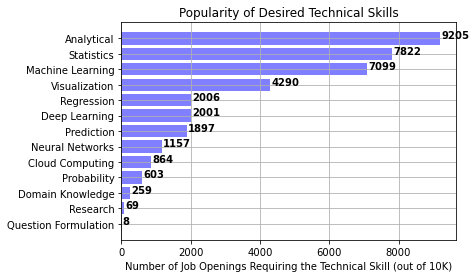

In [33]:
# construct a dataFrame using the TS keywords and TS keyword counts
df_TS = pd.DataFrame({'TS_Keywords':TS_keywords, 'TSkeywords_Counts':TS_Count})
df_TS.sort_values('TSkeywords_Counts',inplace=True)

# now do a bar chart on desired Technical Skills
plt.figure(figsize=(13,8))
fig,ax = plt.subplots()

ax.barh(df_TS.TS_Keywords, df_TS.TSkeywords_Counts, color='b', alpha=0.5, align="center")

plt.title("Popularity of Desired Technical Skills")
ax.set_xlabel("Number of Job Openings Requiring the Technical Skill (out of 10K)")

for i, v in enumerate(df_TS.TSkeywords_Counts):
    ax.text(v + 30, i, str(v), color='black', fontweight='bold')
plt.grid()
plt.savefig("./Images/Bar_Popularity_of_Desired_Technical_Skills.png", bbox_inches='tight')
# plt.tight_layout()
plt.show()

In [36]:
# Keywords for soft skill sets:

# Communication
# Teamwork
# Question formulation
# Storytelling
# Project management

# initialize the flag tags
DSjob_Feb2019['SS_Communication_flag'] = 0 
DSjob_Feb2019['SS_Teamwork_flag'] = 0 
DSjob_Feb2019['SS_QuesForm_flag'] = 0 
DSjob_Feb2019['SS_StoryTelling_flag'] = 0 
DSjob_Feb2019['SS_ProjManagement_flag'] = 0 

DSjob_Feb2019.head(1)

,job_title,category,company_name,city,state,inferred_city,inferred_state,post_date,job_description,job_type,...,TS_CloudComp_flag,TS_Regress_flag,TS_Probability_flag,TS_Prediction_flag,TS_NeuralNetwork_flag,SS_Communication_flag,SS_Teamwork_flag,SS_QuesForm_flag,SS_StoryTelling_flag,SS_ProjManagement_flag
0,enterprise data scientist i,accounting/finance,Farmers Insurance Group,Woodland Hills,CA,Woodland hills,California,2019-02-06,read what people are saying about working here...,undefined,...,0,0,0,0,1,0,0,0,0,0


In [41]:
for irow in np.arange(len(DSjob_Feb2019)):
    
#     DSjob_Feb2019.job_description[irow] = DSjob_Feb2019.job_description[irow].casefold()
#     DSjob_Feb2019.job_description[irow] = DSjob_Feb2019.job_description[irow].casefold()

    if (("communica" in DSjob_Feb2019.job_description[irow]) or ("personal skill" in DSjob_Feb2019.job_description[irow])\
       or ("people skill" in DSjob_Feb2019.job_description[irow])):
        DSjob_Feb2019.iloc[irow,27] = 1
    
    if (("teamwork" in DSjob_Feb2019.job_description[irow]) or ("team work" in DSjob_Feb2019.job_description[irow])\
          or ("team player" in DSjob_Feb2019.job_description[irow]) or ("collabor" in DSjob_Feb2019.job_description[irow])):
        DSjob_Feb2019.iloc[irow,28] = 1
        
    if ("question formulation" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,29] = 1
        
    if (("story telling" in DSjob_Feb2019.job_description[irow]) or ("storytelling" in DSjob_Feb2019.job_description[irow])):
        DSjob_Feb2019.iloc[irow,30] = 1
    
    if ("project management" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,31] = 1  
    
SS_keywords = ['Communication', 'Teamwork', 'Question_Formulation', 'Story_Telling','Project_Management']
SS_Count = np.arange(len(SS_keywords))

for i_tech_skill in np.arange(len(SS_keywords)):
    SS_Count[i_tech_skill] = DSjob_Feb2019.iloc[:,27+i_tech_skill].sum()

SS_Count

array([6577, 4937,    8,  178,  673])

<Figure size 936x576 with 0 Axes>

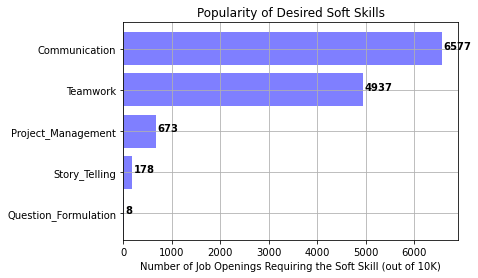

In [43]:
# construct a dataFrame using the SS keywords and SS keyword counSS
df_SS = pd.DataFrame({'SS_Keywords':SS_keywords, 'SSkeywords_Counts':SS_Count})
df_SS.sort_values('SSkeywords_Counts',inplace=True)

# now do a bar chart on desired Technical Skills
plt.figure(figsize=(13,8))
fig,ax = plt.subplots()

ax.barh(df_SS.SS_Keywords, df_SS.SSkeywords_Counts, color='b', alpha=0.5, align="center")

plt.title("Popularity of Desired Soft Skills")
ax.set_xlabel("Number of Job Openings Requiring the Soft Skill (out of 10K)")

for i, v in enumerate(df_SS.SSkeywords_Counts):
    ax.text(v + 30, i, str(v), color='black', fontweight='bold')
plt.grid()
plt.savefig("./Images/Bar_Popularity_of_Desired_Soft_Skills.png", bbox_inches='tight')
# plt.tight_layout()
plt.show()

In [44]:
# finalized keywords for technical tools:

# Python
# SQL
# JavaScript / Java
# MongoDB
# Hadoop
# Database
# Excel / VBA
# R
# Spark
# Tableau
# D3

# initialize the flag tags
DSjob_Feb2019['SS_Python_flag'] = 0 
DSjob_Feb2019['SS_SQL_flag'] = 0 
DSjob_Feb2019['SS_JavaScript_flag'] = 0 
DSjob_Feb2019['SS_MongoDB_flag'] = 0 
DSjob_Feb2019['SS_Hadoop_flag'] = 0 
DSjob_Feb2019['SS_Database_flag'] = 0 
DSjob_Feb2019['SS_ExcelVBA_flag'] = 0 
DSjob_Feb2019['SS_R_flag'] = 0 
DSjob_Feb2019['SS_Spark_flag'] = 0 
DSjob_Feb2019['SS_Tableau_flag'] = 0 
DSjob_Feb2019['SS_D3_flag'] = 0 

DSjob_Feb2019.head(1)

,job_title,category,company_name,city,state,inferred_city,inferred_state,post_date,job_description,job_type,...,SS_SQL_flag,SS_JavaScript_flag,SS_MongoDB_flag,SS_Hodoop_flag,SS_Database_flag,SS_ExcelVBA_flag,SS_R_flag,SS_Spark_flag,SS_Tableau_flag,SS_D3_flag
0,enterprise data scientist i,accounting/finance,Farmers Insurance Group,Woodland Hills,CA,Woodland hills,California,2019-02-06,read what people are saying about working here...,undefined,...,0,0,0,0,0,0,0,0,0,0


In [49]:
for irow in np.arange(len(DSjob_Feb2019)):
    
#     DSjob_Feb2019.job_description[irow] = DSjob_Feb2019.job_description[irow].casefold()
#     DSjob_Feb2019.job_description[irow] = DSjob_Feb2019.job_description[irow].casefold()

    if ("python" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,32] = 1
    
    if ("sql" in DSjob_Feb2019.job_description[irow]) :
        DSjob_Feb2019.iloc[irow,33] = 1
        
    if ("java" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,34] = 1
        
    if ("mangodb" in DSjob_Feb2019.job_description[irow]) :
        DSjob_Feb2019.iloc[irow,35] = 1
    
    if ("hadoop" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,36] = 1  
        
    if ("database" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,37] = 1
    
    if (("excel" in DSjob_Feb2019.job_description[irow]) or ("vba" in DSjob_Feb2019.job_description[irow])) :
        DSjob_Feb2019.iloc[irow,38] = 1
        
    if ((" r " in DSjob_Feb2019.job_description[irow]) or (" r." in DSjob_Feb2019.job_description[irow])\
        or ((" r," in DSjob_Feb2019.job_description[irow]))):
        DSjob_Feb2019.iloc[irow,39] = 1
        
    if ("spark" in DSjob_Feb2019.job_description[irow]) :
        DSjob_Feb2019.iloc[irow,40] = 1
    
    if ("tableau" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,41] = 1  
        
    if ("d3" in DSjob_Feb2019.job_description[irow]):
        DSjob_Feb2019.iloc[irow,42] = 1  
    
TT_keywords = ['Python', 'SQL', 'Java', 'MangoDB','Hadoop','Database','Excel/VBA','R','Spark','Tableau','D3']
TT_Count = np.arange(len(TT_keywords))

for i_tech_tool in np.arange(len(TT_keywords)):
    TT_Count[i_tech_tool] = DSjob_Feb2019.iloc[:,32+i_tech_tool].sum()

print(TT_Count)

# construct a dataFrame using the TT keywords and TT keyword counSS
df_TT = pd.DataFrame({'TT_Keywords':TT_keywords, 'TTkeywords_Counts':TT_Count})
df_TT.sort_values('TTkeywords_Counts',inplace=True)

[8536 7247 6088 3052 4286 3495 3987 5071 3052 2160  467]


<Figure size 936x576 with 0 Axes>

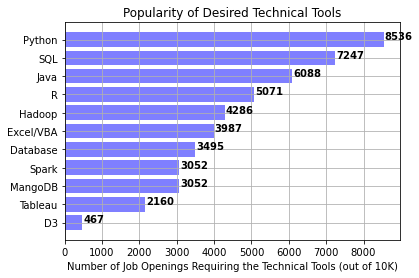

In [50]:
# now do a bar chart on desired Technical Skills
plt.figure(figsize=(13,8))
fig,ax = plt.subplots()

ax.barh(df_TT.TT_Keywords, df_TT.TTkeywords_Counts, color='b', alpha=0.5, align="center")

plt.title("Popularity of Desired Technical Tools")
ax.set_xlabel("Number of Job Openings Requiring the Technical Tools (out of 10K)")

for i, v in enumerate(df_TT.TTkeywords_Counts):
    ax.text(v + 30, i, str(v), color='black', fontweight='bold')
plt.grid()
plt.savefig("./Images/Bar_Popularity_of_Desired_Technial_Tools.png", bbox_inches='tight')
# plt.tight_layout()
plt.show()